<a href="https://colab.research.google.com/github/nat13lla/Digital-Futures/blob/main/TMDB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programmatic Data Wrangling - TMDB Project**

## The Brief:

* This is the end of module assignment for Programmatic Data Wrangling, where you'll be perform Exploratory Data Analysis and draw insights from a small, but comprehensive movie data.
* Your single deliverable to submit is 1 ipynb file containing all your exploration.
* It is expected that your notebook is thoroughly annotated & code commented for it to be easily accessed & interpreted.

* Your task is to freely explore the data & draw insights from it. However, the following outcomes are expected:
  * 3 Python visualisations showcasing insights drawn from the data
  * 2 keypoints drawn from the data - explicitly stated in Markdown format and explained by your code & findings. What did you find most interesting? Or most surprising? Why is that?
  * Select 2 movies on which to provide a more in-depth single observation analysis. Why have you selected these two? What's interesting about them? How do they compare to similar movies?

(These are minimal requirements for this project. Feel free to both expand on them, as well as set more targets for your own exploration!)

## Loading the Data:

In [1]:
# Import Dictionaries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
# Upload the data set
tmdb = pd.read_csv('TMDB_movies.csv')

In [3]:
# Look at the data layout
tmdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# Number of (rows, columns)
tmdb.shape

(4803, 20)

In [5]:
# Look at the data types for each column
tmdb.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
# Information about the numerical columns in the data set
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
# Checking for nulls
    #True Yes it is null!
    #False No it isnt null!
tmdb.isnull();

Because of the size of the data set it can be hard to spot the null values so find the sums for each column:

In [8]:
# What columns have nulls?
tmdb.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

<u>The columns including nulls are: </u>
* homepage - 3091
* overview - 3
* release_date - 1       # can be found using data given
* runtime - 2       # can be found using data given
* tagline - 844

Overall the nulls do not compromise the data too much at the moment and the few missing numerical values could be found through knowledge of the overall data.

### Notes:
- Columns with unusable content:
  * genres
  * keywords
  * production_companies
  * production_countries
  * spoken_languages
- Columns referencing monetary values 'budget' and 'revenue' have a high range with a majoriy in the millions so making it viewable in millions could help undertanding
- nulls - unimportant

## Fixing the Columns

### Looking into Genres

In [9]:
print(tmdb.genres[0]) # It's a list of dictionaries?

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


In [10]:
print(tmdb.genres[1])

[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]


In [11]:
# Check the class for each row of the genres column
print(tmdb.genres.apply(type))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4798    <class 'str'>
4799    <class 'str'>
4800    <class 'str'>
4801    <class 'str'>
4802    <class 'str'>
Name: genres, Length: 4803, dtype: object


In [12]:
# Additional Check all are the same
str_count = tmdb.genres.apply(lambda x: isinstance(x, str)).sum()

# Applies a lambda function to each element of the 'genres' column.
# It checks if each element x is a string (str) using isinstance()
# This lambda function returns True if x is a string and calculates the sum of all positive results

# Print the result
print(f"Values in 'genres' column that are strings: {str_count}")
print(f"Values in 'genres' column that are not strings: {len(tmdb) - str_count}")

Values in 'genres' column that are strings: 4803
Values in 'genres' column that are not strings: 0


In [13]:
# Change the class to list not string
tmdb.genres = tmdb.genres.apply(ast.literal_eval)
# Check
print(tmdb.genres.apply(type))

0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
4798    <class 'list'>
4799    <class 'list'>
4800    <class 'list'>
4801    <class 'list'>
4802    <class 'list'>
Name: genres, Length: 4803, dtype: object


In [14]:
# Check all are the same
str_count = tmdb.genres.apply(lambda x: isinstance(x, str)).sum()

# the result
print(f"Values in 'genres' column that are strings: {str_count}")
print(f"Values in 'genres' column that are not strings: {len(tmdb) - str_count}")

Values in 'genres' column that are strings: 0
Values in 'genres' column that are not strings: 4803


In [15]:
# Function to 'extract' genre names from the lists
def new_genres(genre_list):
    return ', '.join([genre['name'] for genre in genre_list]) #returns a string that contains all the genre names separated by commas # list comprehension that iterates over each dictionary

# Create a new column 'all_genres' using the apply function
tmdb['all_genres'] = tmdb.genres.apply(new_genres)

In [16]:
# Check the new column in the table
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,all_genres
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction"


* We now have an understandable column for genre called all_genres

### Keywords

Repeat same steps as above in genres for keywords

In [17]:
print(tmdb.keywords[0])

[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]


In [18]:
# Check the class
print(tmdb.keywords.apply(type))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4798    <class 'str'>
4799    <class 'str'>
4800    <class 'str'>
4801    <class 'str'>
4802    <class 'str'>
Name: keywords, Length: 4803, dtype: object


In [19]:
# Change the class to list not string
tmdb.keywords = tmdb.keywords.apply(ast.literal_eval)

# Check the class
print(tmdb.keywords.apply(type))

0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
4798    <class 'list'>
4799    <class 'list'>
4800    <class 'list'>
4801    <class 'list'>
4802    <class 'list'>
Name: keywords, Length: 4803, dtype: object


In [20]:
# Function to 'extract' keywords from the lists
def new_keywords(keywords_list):
    return ', '.join([keywords['name'] for keywords in keywords_list])

# Create a new column
tmdb['all_keywords'] = tmdb.keywords.apply(new_keywords)

In [21]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,all_genres,all_keywords
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,..."


* We now have an understandable column for keywords called all_keywords

### Production Companies

In [22]:
print(tmdb.production_companies[0])

[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]


In [23]:
# Check the class
print(tmdb.production_companies.apply(type))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4798    <class 'str'>
4799    <class 'str'>
4800    <class 'str'>
4801    <class 'str'>
4802    <class 'str'>
Name: production_companies, Length: 4803, dtype: object


In [24]:
# Change the class to list not string
tmdb.production_companies = tmdb.production_companies.apply(ast.literal_eval)

# Check the class
print(tmdb.production_companies.apply(type))

0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
4798    <class 'list'>
4799    <class 'list'>
4800    <class 'list'>
4801    <class 'list'>
4802    <class 'list'>
Name: production_companies, Length: 4803, dtype: object


In [25]:
# Function to 'extract' production companies from the lists
def new_production(production_list):
    return ', '.join([production['name'] for production in production_list])

# Create a new column
tmdb['all_production'] = tmdb.production_companies.apply(new_production)

In [26]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,all_genres,all_keywords,all_production
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures


* We now have an understandable column for Production companies called all_production

### Production Countries

In [27]:
print(tmdb.production_countries[0])

[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]


In [28]:
# Check the class
print(tmdb.production_countries.apply(type))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4798    <class 'str'>
4799    <class 'str'>
4800    <class 'str'>
4801    <class 'str'>
4802    <class 'str'>
Name: production_countries, Length: 4803, dtype: object


In [29]:
# Change the class to list not string
tmdb.production_countries = tmdb.production_countries.apply(ast.literal_eval)

# Check the class
print(tmdb.production_countries.apply(type))

0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
4798    <class 'list'>
4799    <class 'list'>
4800    <class 'list'>
4801    <class 'list'>
4802    <class 'list'>
Name: production_countries, Length: 4803, dtype: object


In [30]:
# Function to 'extract' production countries from the lists
def new_countries(countries_list):
    return ', '.join([countries['name'] for countries in countries_list])

# Create a new column
tmdb['all_countries'] = tmdb.production_countries.apply(new_countries)

In [31]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America


* We now have an understandable column for Production Countries called all_countries

### Spoken Lanuages

In [32]:
print(tmdb.spoken_languages[0])

[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]


In [33]:
# Check the class
print(tmdb.spoken_languages.apply(type))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4798    <class 'str'>
4799    <class 'str'>
4800    <class 'str'>
4801    <class 'str'>
4802    <class 'str'>
Name: spoken_languages, Length: 4803, dtype: object


In [34]:
# Change the class to list not string
tmdb.spoken_languages = tmdb.spoken_languages.apply(ast.literal_eval)

# Check the class
print(tmdb.spoken_languages.apply(type))

0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
4798    <class 'list'>
4799    <class 'list'>
4800    <class 'list'>
4801    <class 'list'>
4802    <class 'list'>
Name: spoken_languages, Length: 4803, dtype: object


In [35]:
# Function to 'extract' keywords from the lists
def new_languages(languages_list):
    return ', '.join([languages['name'] for languages in languages_list])

# Create a new column
tmdb['all_languages'] = tmdb.spoken_languages.apply(new_languages)

In [36]:
tmdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries,all_languages
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English


* We now have an understandable column for Spoken Languages called all_languages

## Summary of these changes
* Creating a new database without the old columns

In [37]:
# Create new database to alter
tnmdb = tmdb.copy()
tnmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries,all_languages
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English


In [38]:
tnmdb.drop(columns=['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']);

In [39]:
tnmdb.head();

In [40]:
# Drop Permanently
tnmdb.drop(columns=['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'], inplace = True)

In [41]:
tnmdb.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries,all_languages
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English


In [42]:
# Check that is isn't altered
tmdb.head();

Also created an additional 'budget in mil' and 'revenue in mil' column that could be used to create clearer visualisations. As noticed both these columns have very high values.

In [43]:
# Budget in millions
tnmdb['budget_in_mil'] = tnmdb.budget / 1000000.

In [44]:
# Revenue in millions
tnmdb['revenue_in_mil'] = tnmdb.revenue / 1000000

## Visualisations

In [45]:
tnmdb.head(5)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries,all_languages,budget_in_mil,revenue_in_mil
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español",237.0,2787.965087
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English,300.0,961.000000
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch",245.0,880.674609
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English,250.0,1084.939099
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English,260.0,284.139100


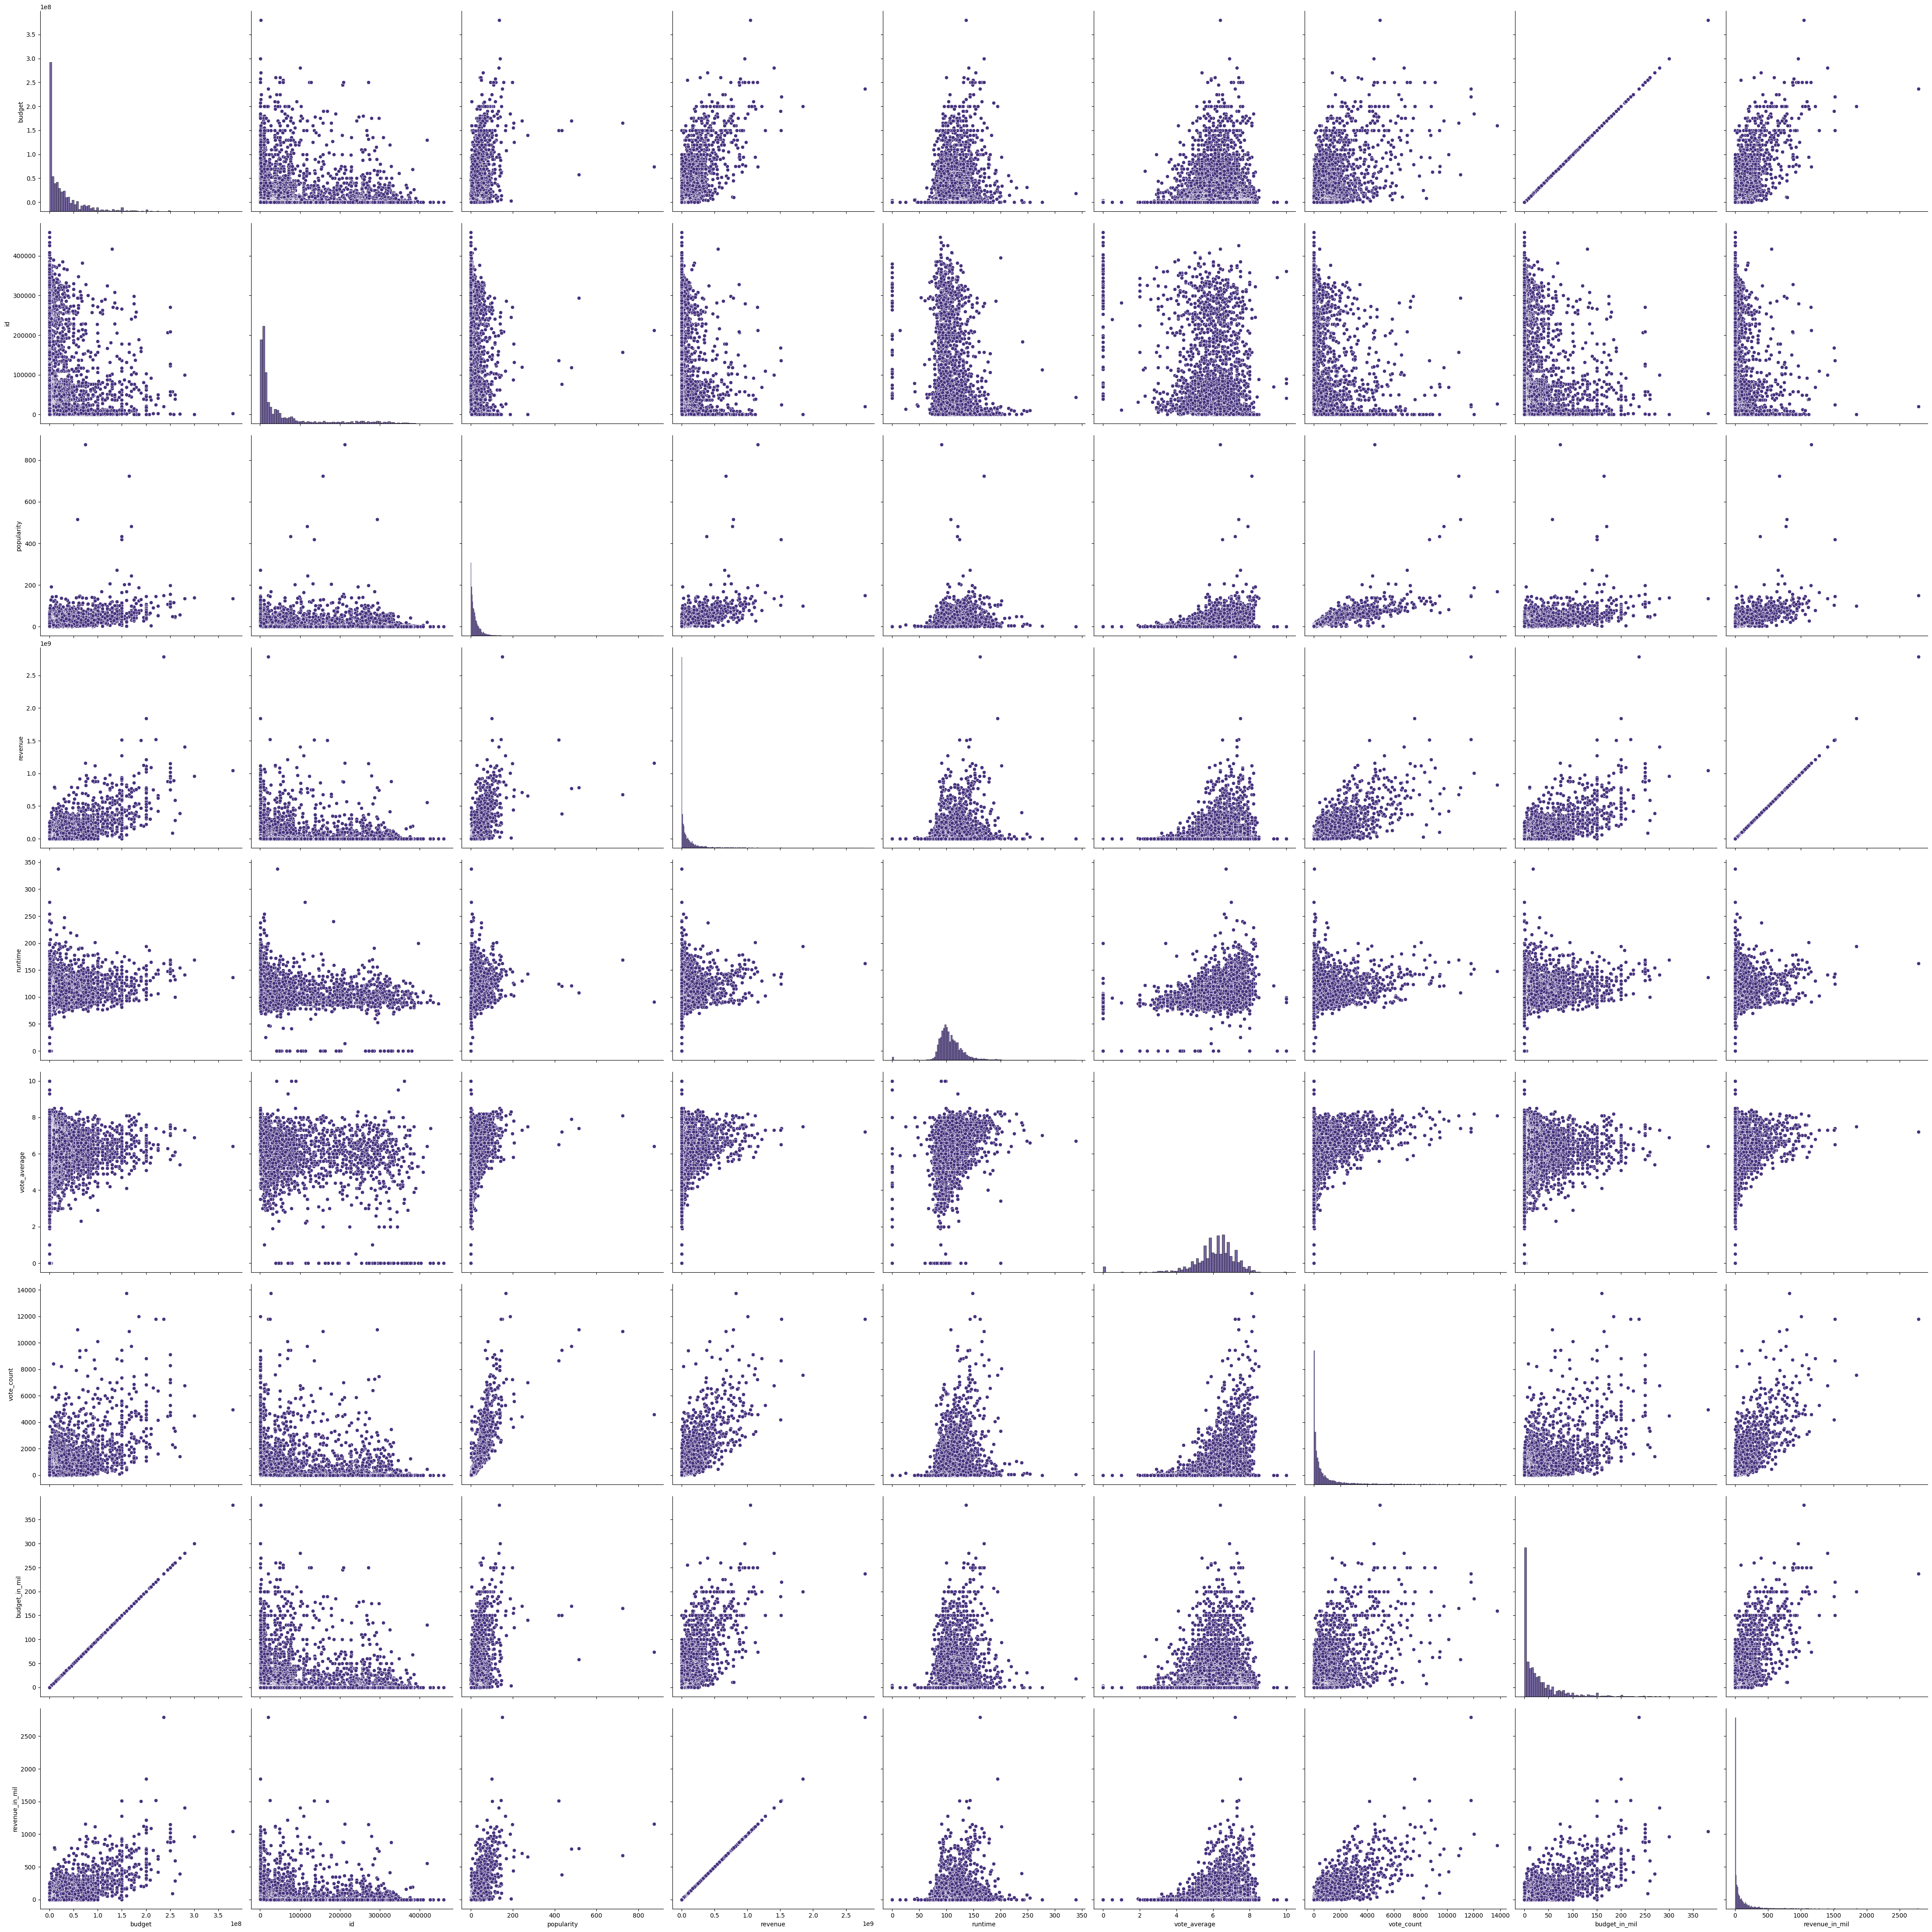

In [46]:
# General Plots
sns.set_palette('viridis')

sns.pairplot(data = tnmdb,
             height = 5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

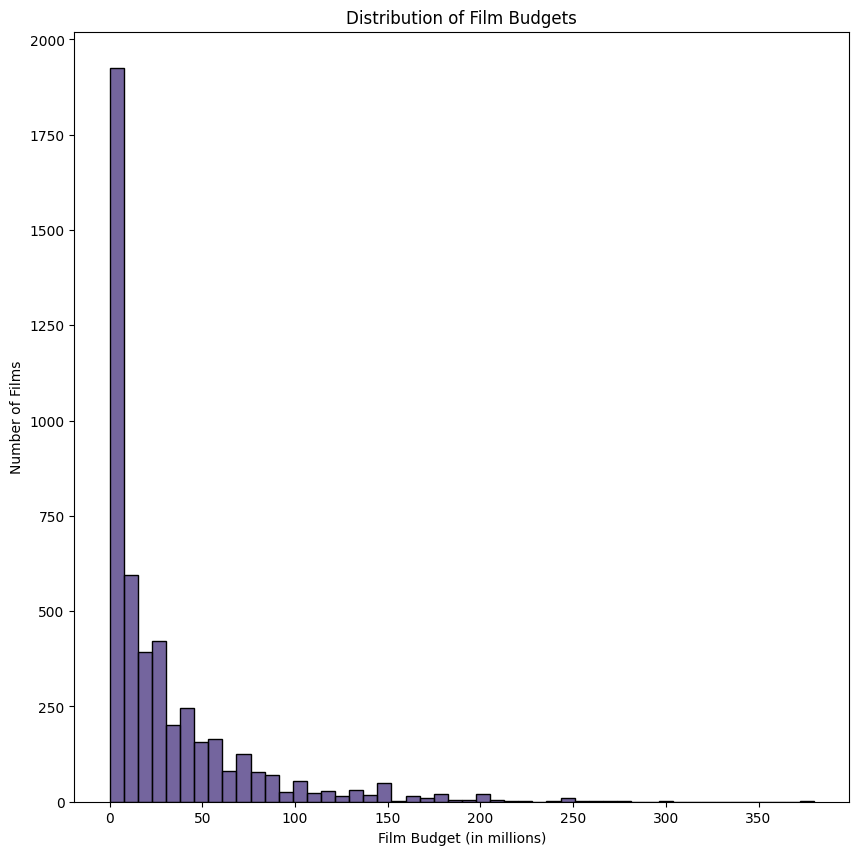

In [47]:
# Number of films within different budget categories# Number of films within different budget categories

plt.figure(figsize = (10,10))
sns.histplot(tnmdb.budget_in_mil,
            bins = 50,
            edgecolor='black')


# Set labels and title
plt.xlabel('Film Budget (in millions)')
plt.ylabel('Number of Films')
plt.title('Distribution of Film Budgets')


#plt.xticks(rotation=0)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

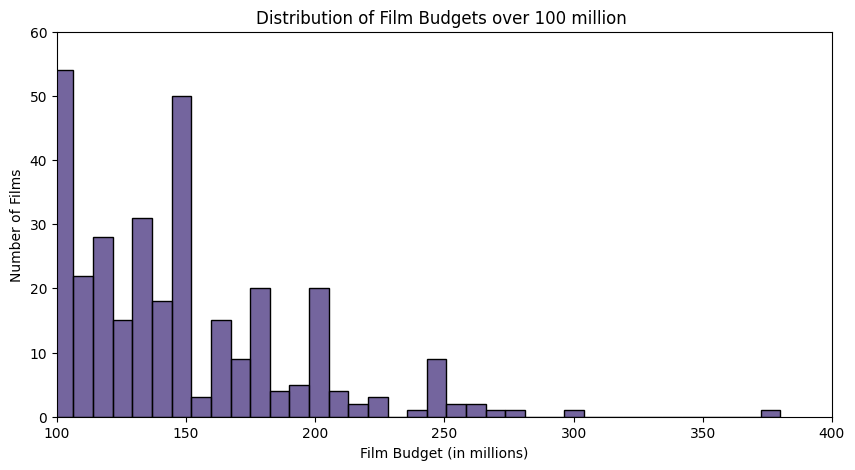

In [48]:
# Number of films within different budget categories# Number of films within different budget categories

plt.figure(figsize = (10,5))
sns.histplot(tnmdb.budget_in_mil,
            bins = 50,
            edgecolor='black')

plt.xlim(100, 400)
plt.ylim(0,60)

# Set labels and title
plt.xlabel('Film Budget (in millions)')
plt.ylabel('Number of Films')
plt.title('Distribution of Film Budgets over 100 million ')


#plt.xticks(rotation=0)

plt.show

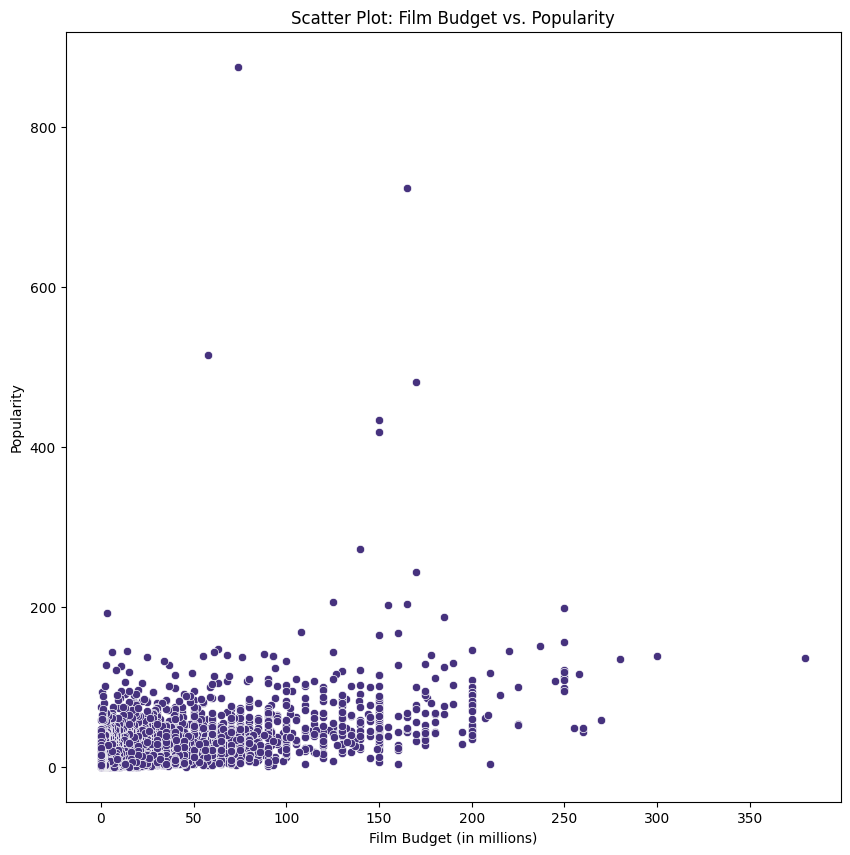

In [49]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='budget_in_mil', y='popularity', data=tnmdb)

# Set labels and title
plt.xlabel('Film Budget (in millions)')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Film Budget vs. Popularity')

# Display the plot
plt.show()

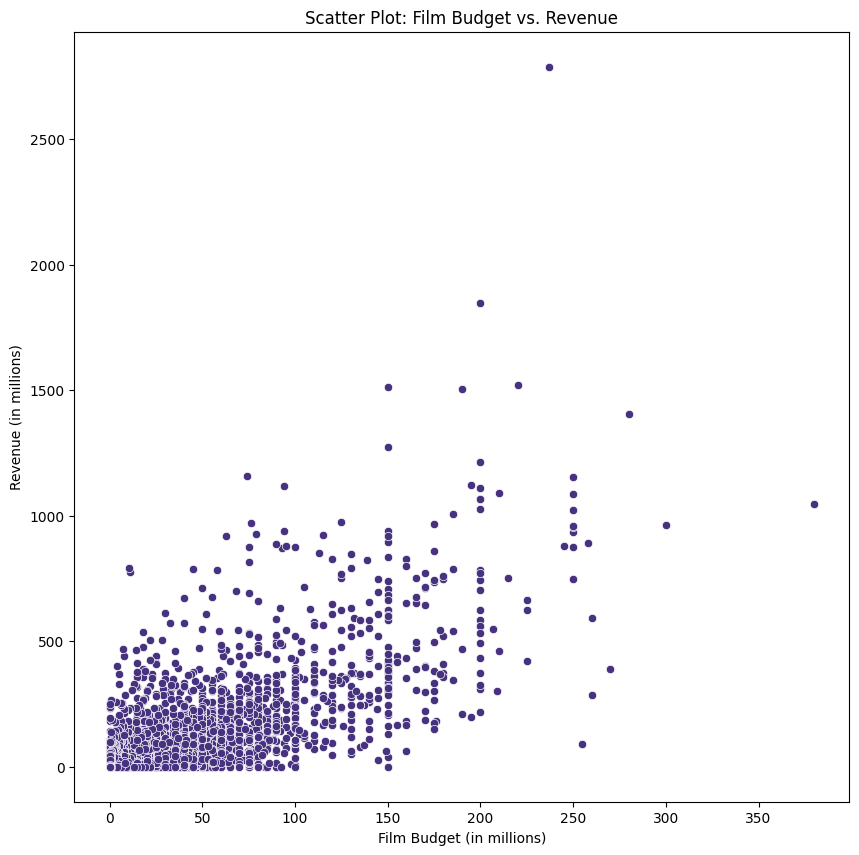

In [50]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='budget_in_mil', y='revenue_in_mil', data=tnmdb)

# Set labels and title
plt.xlabel('Film Budget (in millions)')
plt.ylabel('Revenue (in millions)')
plt.title('Scatter Plot: Film Budget vs. Revenue')

# Display the plot
plt.show()

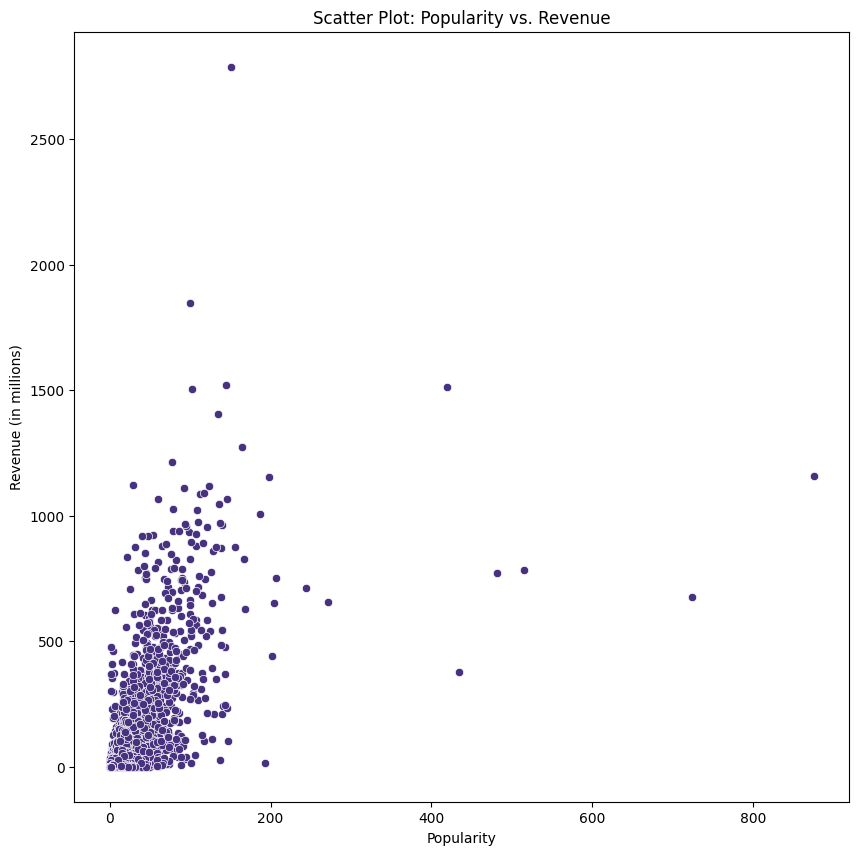

In [51]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='popularity', y='revenue_in_mil', data=tnmdb)

# Set labels and title
plt.xlabel('Popularity')
plt.ylabel('Revenue (in millions)')
plt.title('Scatter Plot: Popularity vs. Revenue')

# Display the plot
plt.show()

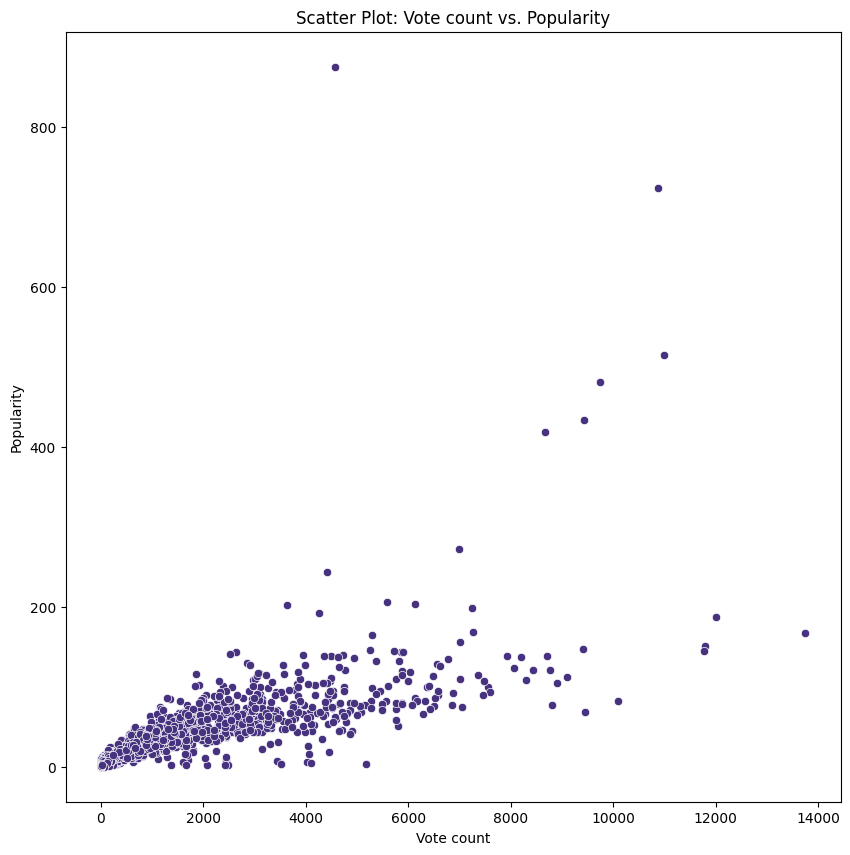

In [52]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='vote_count', y='popularity', data=tnmdb)

# Set labels and title
plt.xlabel('Vote count')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Vote count vs. Popularity')

# Display the plot
plt.show()

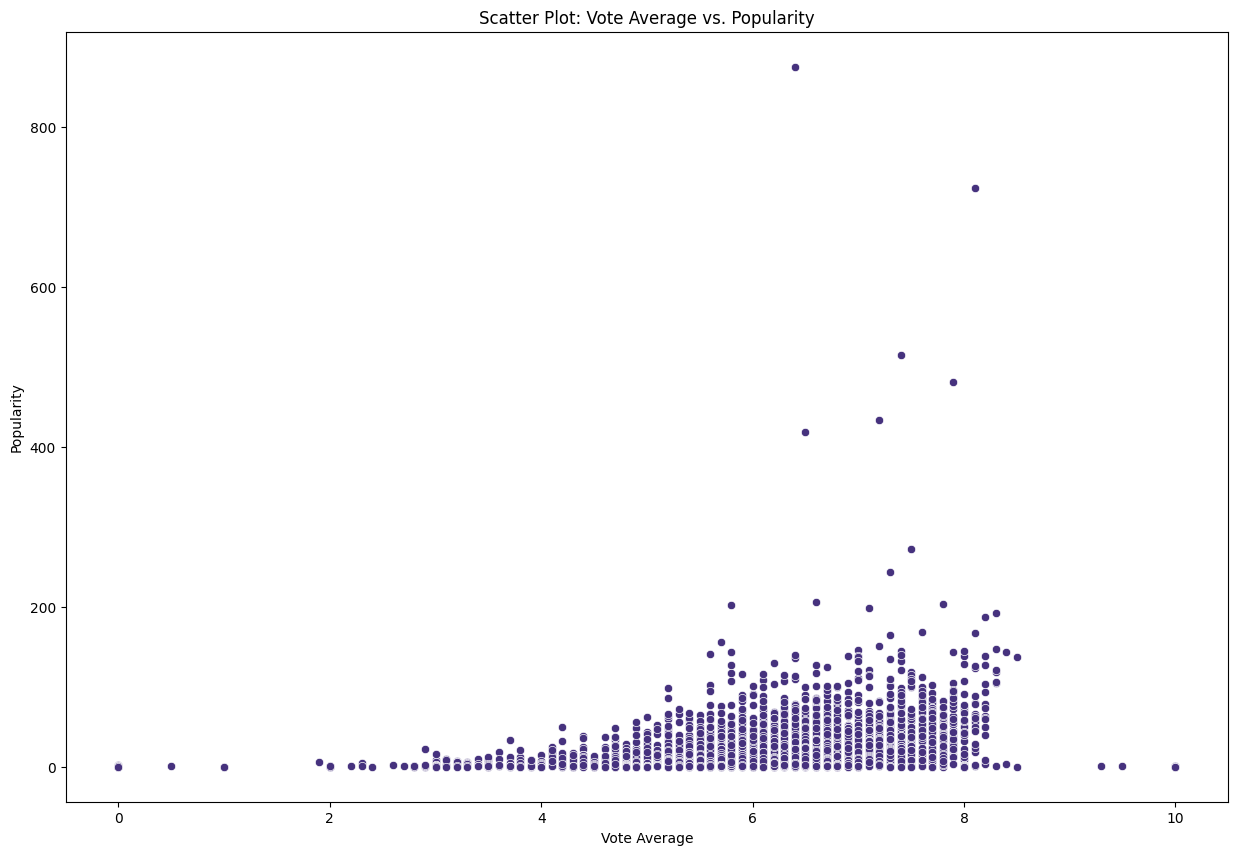

In [53]:
plt.figure(figsize = (15,10))
sns.scatterplot(x='vote_average', y='popularity', data=tnmdb)

# Set labels and title
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Vote Average vs. Popularity')

# Display the plot
plt.show()

## Checking Unique title names



In [66]:
# Check the number of unique ids is equal to no. of rows(4803)
unique_id = set(tnmdb.id)
len(unique_id)

4803

In [67]:
# Check the number of unique titles is equal to no. of rows(4803)
unique_title = set(tnmdb.title)
len(unique_title)

4800

* The result shows only 4800 unique titles. So there are 3 rows with duplicate title names

In [68]:
# showing the number of times a title occurs
# .value_counts = used to count the occurrences of unique values
title_counts = tnmdb['title'].value_counts()

# Print the title and its count
print(title_counts)

The Host                 2
Batman                   2
Out of the Blue          2
Avatar                   1
The Girl on the Train    1
                        ..
Step Up 3D               1
Secondhand Lions         1
The Age of Adaline       1
Drag Me to Hell          1
My Date with Drew        1
Name: title, Length: 4800, dtype: int64


In [69]:
# Show for each row if the title has a duplicate true/false
duplicate_titles = tnmdb['title'].duplicated(keep=False)

duplicate_titles

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Name: title, Length: 4803, dtype: bool

In [70]:
# Find and output only the rows with duplicate titles
duplicate_titles = tnmdb[tnmdb['title'].duplicated(keep=False)]

# Adding an extra tmdb[] around the finding duplicate values code used previously
# This creates a 'subset' of the data frame that shows all the data associated with the 'duplicated titles'
# It selects rows where the 'title' column has duplicate values and assigns them to a new data frame 'duplicate_titles'

# Show the duplicate titles data frame
duplicate_titles

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries,all_languages,budget_in_mil,revenue_in_mil
972,44000000,NaN,72710,en,The Host,A parasitic alien soul is injected into the bo...,42.933027,2013-03-22,63327201,125.0,...,The Host,6.0,1817,"Action, Adventure, Romance, Science Fiction, T...","based on novel, mass murder, dystopia, genocid...","Nick Wechsler Productions, Open Road Films, Si...",United States of America,English,44.0000,63.327201
1359,35000000,NaN,268,en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,1989-06-23,411348924,126.0,...,Batman,7.0,2096,"Fantasy, Action","double life, dc comics, dual identity, chemica...","PolyGram Filmed Entertainment, The Guber-Peter...","United Kingdom, United States of America","English, Français",35.0000,411.348924
2877,11000000,http://www.hostmovie.com/,1255,ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,2006-07-27,88489643,119.0,...,The Host,6.7,537,"Horror, Drama, Science Fiction","river, mobile phone, bravery, archer, daughter...","Cineclick Asia, Happinet Pictures, Cheongeoram...",South Korea,한국어/조선말,11.0000,88.489643
3647,0,NaN,39269,en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,1980-05-01,0,94.0,...,Out of the Blue,6.5,17,Drama,"punk, independent film, coming of age, teenage...",Robson Street,Canada,English,0.0000,0.000000
3693,0,NaN,10844,en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,2006-10-12,0,103.0,...,Out of the Blue,5.9,18,Drama,"new zealand, gun rampage, police, independent ...",,New Zealand,English,0.0000,0.000000
4267,1377800,NaN,2661,en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,1966-07-30,0,105.0,...,Batman,6.1,203,"Family, Adventure, Comedy, Science Fiction, Crime","submarine, dc comics, missile, shark attack, r...","Twentieth Century Fox Film Corporation, DC Com...",United States of America,English,1.3778,0.000000


The duplicate titles here are 'Batman', 'The Host' and 'Out of the Blue'. 'The Host' has a clear difference as the two films are made in different countries, while the other dulicate titles have other varying values. Notably 'The Host' doesnt appear duplicated in the origial_titles column as it is shown in the original language where it was made.

## Checking Unique original title names:

In [71]:
# Check the number of unique titles is equal to no. of rows(4803)
unique_ogtitle = set(tnmdb.original_title)
len(unique_ogtitle)

4801

* The result shows only 4801 unique titles. So there are two rows with duplicate title name but different ids.

In [72]:
# Find and output only the rows with duplicate titles
duplicate_ogtitles = tnmdb[tnmdb['original_title'].duplicated(keep=False)]

# Print the duplicate titles
duplicate_ogtitles

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries,all_languages,budget_in_mil,revenue_in_mil
1359,35000000,NaN,268,en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,1989-06-23,411348924,126.0,...,Batman,7.0,2096,"Fantasy, Action","double life, dc comics, dual identity, chemica...","PolyGram Filmed Entertainment, The Guber-Peter...","United Kingdom, United States of America","English, Français",35.0000,411.348924
3647,0,NaN,39269,en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,1980-05-01,0,94.0,...,Out of the Blue,6.5,17,Drama,"punk, independent film, coming of age, teenage...",Robson Street,Canada,English,0.0000,0.000000
3693,0,NaN,10844,en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,2006-10-12,0,103.0,...,Out of the Blue,5.9,18,Drama,"new zealand, gun rampage, police, independent ...",,New Zealand,English,0.0000,0.000000
4267,1377800,NaN,2661,en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,1966-07-30,0,105.0,...,Batman,6.1,203,"Family, Adventure, Comedy, Science Fiction, Crime","submarine, dc comics, missile, shark attack, r...","Twentieth Century Fox Film Corporation, DC Com...",United States of America,English,1.3778,0.000000


The original titles only have 2 duplicates, 'Batman' and 'Out of the Blue', all rows have different values across the data suggesting it is 4 disticty different films. To further use the data it would be useful to note the differences across both title columns to reduce the chances of accidentaly removing duplicates due to title and reduce chances of error due to these 'duplicates'.

## Movie Comparisons

<ipython-input-62-7be6b2acb32e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(data=data_to_compare,
<ipython-input-62-7be6b2acb32e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(['Batman - 1989','Batman - 1966'])


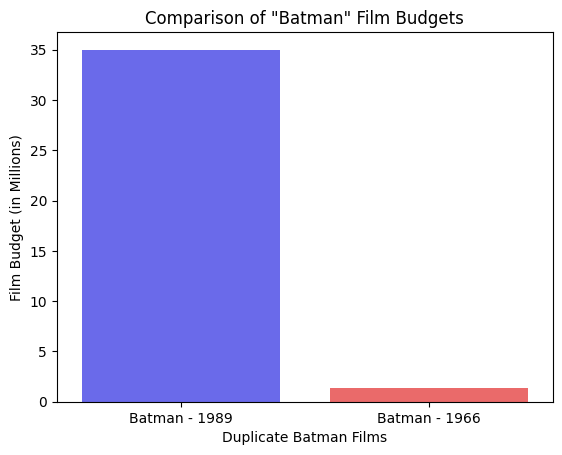

In [62]:
data_to_compare = tnmdb.loc[[1359, 4267], ['budget_in_mil']]

# Bar Chart
chart = sns.barplot(data=data_to_compare,
            x=data_to_compare.index,
            y='budget_in_mil',
            palette='seismic')

#change the individual labels to corresponding value
chart.set_xticklabels(['Batman - 1989','Batman - 1966'])

# Labels and title
plt.xlabel('Duplicate Batman Films')
plt.ylabel('Film Budget (in Millions)')
plt.title('Comparison of "Batman" Film Budgets')

# Display the plot
plt.show()

<ipython-input-63-9c19dc21110f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(data=data_to_compare,
<ipython-input-63-9c19dc21110f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(['Batman - 1989','Batman - 1966'])


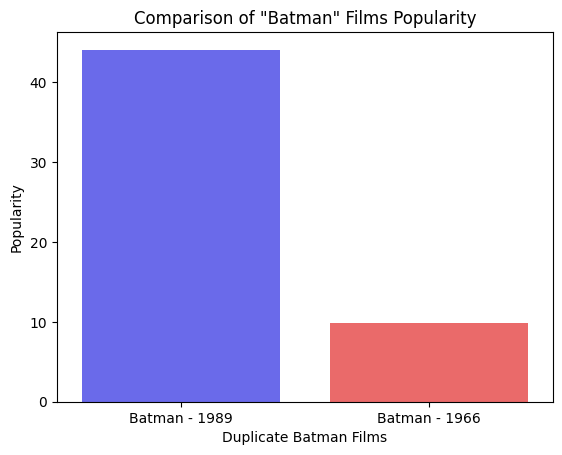

In [63]:
data_to_compare = tnmdb.loc[[1359, 4267], ['popularity']]

# Bar Chart
chart = sns.barplot(data=data_to_compare,
            x=data_to_compare.index,
            y='popularity',
            palette='seismic')

# Change the individual labels to corresponding value
chart.set_xticklabels(['Batman - 1989','Batman - 1966'])

# Labels and title
plt.xlabel('Duplicate Batman Films')
plt.ylabel('Popularity')
plt.title('Comparison of "Batman" Films Popularity')

# Display the plot
plt.show()

<ipython-input-73-f390697ffbc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(data=data_to_compare,
<ipython-input-73-f390697ffbc7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(['Batman - 1989','Batman - 1966'])


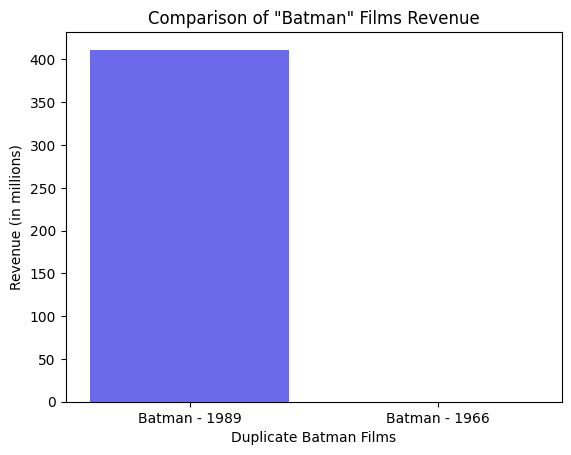

In [73]:
data_to_compare = tnmdb.loc[[1359, 4267], ['revenue_in_mil']]

# Bar Chart
chart = sns.barplot(data=data_to_compare,
            x=data_to_compare.index,
            y='revenue_in_mil',
            palette='seismic')

# Change the individual labels to corresponding value
chart.set_xticklabels(['Batman - 1989','Batman - 1966'])

# Labels and title
plt.xlabel('Duplicate Batman Films')
plt.ylabel('Revenue (in millions)')
plt.title('Comparison of "Batman" Films Revenue')

# Display the plot
plt.show()

In [64]:
# Comparison of the two Batman Films showing some key differeing factors
comparison = tnmdb[tnmdb['title'] == 'Batman'][['title', 'overview', 'all_genres', 'release_date', 'all_keywords', 'revenue']].copy()
comparison.head()

,title,overview,all_genres,release_date,all_keywords,revenue
1359,Batman,The Dark Knight of Gotham City begins his war ...,"Fantasy, Action",1989-06-23,"double life, dc comics, dual identity, chemica...",411348924
4267,Batman,The Dynamic Duo faces four super-villains who ...,"Family, Adventure, Comedy, Science Fiction, Crime",1966-07-30,"submarine, dc comics, missile, shark attack, r...",0


Here is is clearly visible that the genres of the two films do not match, neither does the overview description. However one of the keywords, 'dc comics' does appear under both films. Also interestingly the revenue in the 1966 film shows 0.

In [65]:
# Shows all the columns from the previous data frame
comparison2 = tnmdb[tnmdb['title'] == 'Batman'].copy()
comparison2.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,title,vote_average,vote_count,all_genres,all_keywords,all_production,all_countries,all_languages,budget_in_mil,revenue_in_mil
1359,35000000,NaN,268,en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,1989-06-23,411348924,126.0,...,Batman,7.0,2096,"Fantasy, Action","double life, dc comics, dual identity, chemica...","PolyGram Filmed Entertainment, The Guber-Peter...","United Kingdom, United States of America","English, Français",35.0000,411.348924
4267,1377800,NaN,2661,en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,1966-07-30,0,105.0,...,Batman,6.1,203,"Family, Adventure, Comedy, Science Fiction, Crime","submarine, dc comics, missile, shark attack, r...","Twentieth Century Fox Film Corporation, DC Com...",United States of America,English,1.3778,0.000000
